In [1]:
import numpy as np
import pandas as pd
import math
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [2]:
df=pd.read_csv('dataset/train.csv')
df=df.drop('id',axis=1)

In [3]:
df.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.0+ KB


In [5]:
math.isnan(df['keyword'][0])

True

In [6]:
def nan(x):
    try:
        if math.isnan(x):
            return 'Missing'
    except:
        return x

In [7]:
df['keyword']=df['keyword'].apply(lambda x:nan(x))
df['location']=df['location'].apply(lambda x:nan(x))

In [8]:
df.head()

,keyword,location,text,target
0,Missing,Missing,Our Deeds are the Reason of this #earthquake M...,1
1,Missing,Missing,Forest fire near La Ronge Sask. Canada,1
2,Missing,Missing,All residents asked to 'shelter in place' are ...,1
3,Missing,Missing,"13,000 people receive #wildfires evacuation or...",1
4,Missing,Missing,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7613 non-null   object
 1   location  7613 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.0+ KB


In [10]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
def char_count(x):
    s=x.split()
    x=''.join(s)
    return len(x)

In [12]:
df['Word_Count']=df['text'].apply(lambda x:len(x.split()))
df['Character_count']=df['text'].apply(lambda x:char_count(x))

In [13]:
df.head()

,keyword,location,text,target,Word_Count,Character_count
0,Missing,Missing,Our Deeds are the Reason of this #earthquake M...,1,13,57
1,Missing,Missing,Forest fire near La Ronge Sask. Canada,1,7,32
2,Missing,Missing,All residents asked to 'shelter in place' are ...,1,22,112
3,Missing,Missing,"13,000 people receive #wildfires evacuation or...",1,8,57
4,Missing,Missing,Just got sent this photo from Ruby #Alaska as ...,1,16,72


In [14]:
df['StopWord_Count']=df['text'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))

In [15]:
df.head()

,keyword,location,text,target,Word_Count,Character_count,StopWord_Count
0,Missing,Missing,Our Deeds are the Reason of this #earthquake M...,1,13,57,6
1,Missing,Missing,Forest fire near La Ronge Sask. Canada,1,7,32,0
2,Missing,Missing,All residents asked to 'shelter in place' are ...,1,22,112,9
3,Missing,Missing,"13,000 people receive #wildfires evacuation or...",1,8,57,1
4,Missing,Missing,Just got sent this photo from Ruby #Alaska as ...,1,16,72,6


In [16]:
df['Mention_count']=df['text'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))
df['Hashtag_count']=df['text'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))

In [17]:
df['Numerics_Count']=df['text'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [18]:
df['Upper_Count']=df['text'].apply(lambda x:len([t for t in x.split() if t.isupper()]))

In [19]:
df.head()

,keyword,location,text,target,Word_Count,Character_count,StopWord_Count,Mention_count,Hashtag_count,Numerics_Count,Upper_Count
0,Missing,Missing,Our Deeds are the Reason of this #earthquake M...,1,13,57,6,0,1,0,1
1,Missing,Missing,Forest fire near La Ronge Sask. Canada,1,7,32,0,0,0,0,0
2,Missing,Missing,All residents asked to 'shelter in place' are ...,1,22,112,9,0,0,0,0
3,Missing,Missing,"13,000 people receive #wildfires evacuation or...",1,8,57,1,0,1,0,0
4,Missing,Missing,Just got sent this photo from Ruby #Alaska as ...,1,16,72,6,0,2,0,0


# Clearning and preprocessing the data

In [20]:
## LowerCase Conversion
df['text']=df['text'].apply(lambda x:str(x).lower())

In [21]:
#contraction to expansion  (I'll: I Will)
import contractions

In [22]:
test="I don't go to won't the market"

In [23]:
def Cont2Exp(x):
    if type(x) is str:
        a=[]
        for word in x.split():
            a.append(contractions.fix(word))
        expanded_text = ' '.join(a)
        return expanded_text
    else:
        return x

In [24]:
df['text']=df['text'].apply(lambda x:Cont2Exp(x))

## Counting and Removing Emails from the dataset

In [25]:
import re

In [26]:
df['emails']=df['text'].apply(lambda x:re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+._-]+)',x))

In [27]:
df['email_Count']=df['emails'].apply(lambda x: len(x))

In [28]:
# Remove emails from the tweets
df['text']=df['text'].apply(lambda x:re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+._-]+)',"",x))

In [29]:
#Counting urls and removing it from the tweets
df['url_flag']=df['text'].apply(lambda x:len(re.findall(r'(http|https|ftp|ssh://([\w_-]+(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))
df['text']=df['text'].apply(lambda x:(re.sub(r'(http|https|ftp|ssh://([\w_-]+(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)))

In [30]:
# Retweet flag and remove rt from the begining
df['Retweet_flag']=df['text'].apply(lambda x:len(re.findall(r'\brt\b',x)))
df['text']=df['text'].apply(lambda x:(re.sub(r'\brt\b','',x)))

In [31]:
# Remove Special Characters
df['text']=df['text'].apply(lambda x:re.sub(r'[^\w ]+',"",x))

In [32]:
# Remove Numeric
df['text']=df['text'].apply(lambda x:re.sub(r'[0-9]','',x))

In [33]:
#Remove Extra Spaces
df['text']=df['text'].apply(lambda x:' '.join(x.split()))

In [34]:
#Remove HTML Tags
from bs4 import BeautifulSoup 
df['text']=df['text'].apply(lambda x:BeautifulSoup(x, 'lxml').get_text().strip())

In [35]:
# Remove Accented Char
import unicodedata
def RemoveAccentedChar(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x
df['text']=df['text'].apply(lambda x:RemoveAccentedChar(x))

In [36]:
# Removing StopWords
df['text']=df['text'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [37]:
# Covert text to it's base form (Lemmatizing)
nlp=spacy.load('en_core_web_sm')
def make_to_base(x):
    x=str(x)
    x_list=[]
    doc=nlp(x)
    
    for token in doc:
        lemma=token.lemma_
        if lemma=='-PRON-' or lemma=='be':
            lemma=token.text
        x_list.append(lemma)
    return ' '.join(x_list)
df['text']=df['text'].apply(lambda x:make_to_base(x))

In [38]:
# Removing Most occuring words
text=' '.join(df['text'])
text=text.split()
freq_comm=pd.Series(text).value_counts()
f2=freq_comm[:2]
df['text']=df['text'].apply(lambda x:' '.join([t for t in x.split() if t not in f2]))

In [39]:
# Removing Rarely occuring words
rare10000=freq_comm.tail(10000)
df['text']=df['text'].apply(lambda x:' '.join([t for t in x.split() if t not in rare10000]))

In [40]:
# Remove Blank tweet 
a=df['text'].apply(lambda x:len(x.split()))
df_filtered=df[a==0]
df.drop(df_filtered.index, inplace = True)

In [41]:
df.head()

,keyword,location,text,target,Word_Count,Character_count,StopWord_Count,Mention_count,Hashtag_count,Numerics_Count,Upper_Count,emails,email_Count,url_flag,Retweet_flag
0,Missing,Missing,deed reason earthquake allah forgive,1,13,57,6,0,1,0,1,[],0,0,0
1,Missing,Missing,forest fire near la canada,1,7,32,0,0,0,0,0,[],0,0,0
2,Missing,Missing,resident ask shelter place officer evacuation ...,1,22,112,9,0,0,0,0,[],0,0,0
3,Missing,Missing,people receive wildfire evacuation order calif...,1,8,57,1,0,1,0,0,[],0,0,0
4,Missing,Missing,got send photo alaska smoke wildfire pour school,1,16,72,6,0,2,0,0,[],0,0,0


## VIsualization

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [43]:
text=' '.join(df['text'])

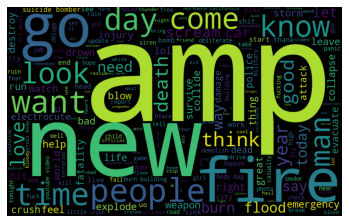

In [44]:
wc=WordCloud(width=800,height=500).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

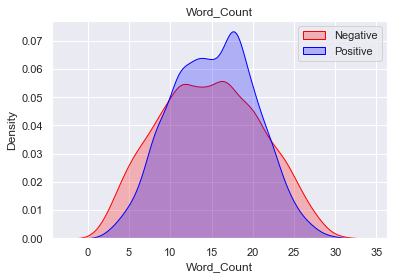

In [45]:
# Word Count of positive and negative
sns.kdeplot(df[df['target']==0]['Word_Count'],shade=True, color='red',label='Negative')
sns.kdeplot(df[df['target']==1]['Word_Count'],shade=True, color='blue',label='Positive')
plt.title('Word_Count')
plt.legend()

##### This tells us about that there are more words in the tweets when there was disaster

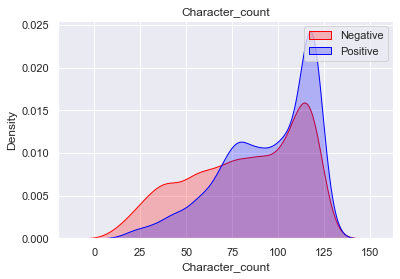

In [46]:
# Character Count of positive and negative
sns.kdeplot(df[df['target']==0]['Character_count'],shade=True, color='red',label='Negative')
sns.kdeplot(df[df['target']==1]['Character_count'],shade=True, color='blue',label='Positive')
plt.title('Character_count')
plt.legend()

##### This tells us about that there are more words in the tweets when there was disaster

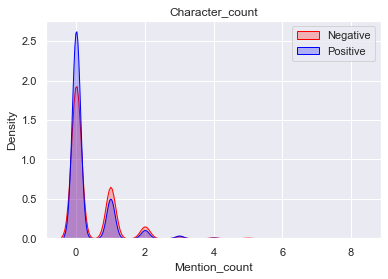

In [47]:
# Mentionunt of positive and negative
sns.kdeplot(df[df['target']==0]['Mention_count'],shade=True, color='red',label='Negative')
sns.kdeplot(df[df['target']==1]['Mention_count'],shade=True, color='blue',label='Positive')
plt.title('Character_count')
plt.legend()

#### In no disaster situation there are mentions more than when there was disaster

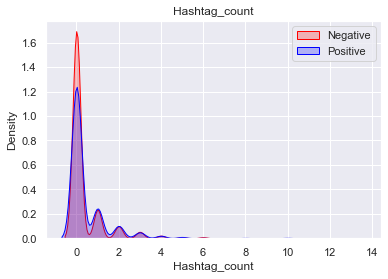

In [48]:
# Hashtag_count of positive and negative
sns.kdeplot(df[df['target']==0]['Hashtag_count'],shade=True, color='red',label='Negative')
sns.kdeplot(df[df['target']==1]['Hashtag_count'],shade=True, color='blue',label='Positive')
plt.title('Hashtag_count')
plt.legend()

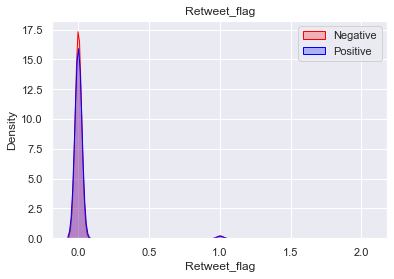

In [49]:
# Retweet_flag of positive and negative
sns.kdeplot(df[df['target']==0]['Retweet_flag'],shade=True, color='red',label='Negative')
sns.kdeplot(df[df['target']==1]['Retweet_flag'],shade=True, color='blue',label='Positive')
plt.title('Retweet_flag')
plt.legend()

## Saving preprocessed data file

In [50]:
df.to_csv('train_preprocessed_prelim.csv',index=False)